# Time Series Forecasting- Gold Price 


In [1]:
import yfinance as yf
import pandas as pd
setattr(pd, "Int64Index", pd.Index)
setattr(pd, "Float64Index", pd.Index)
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
import pandas_datareader as pdr
%matplotlib inline




# Extracting the data

In [2]:
data = yf.download("GOLD", start="2019-01-01", end="2024-04-15")

[*********************100%%**********************]  1 of 1 completed


# Data Description

In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,13.640000,13.690000,13.050000,13.100000,11.542786,16483400
2019-01-03,13.300000,13.340000,12.810000,13.000000,11.454672,19135900
2019-01-04,12.890000,13.170000,12.660000,13.090000,11.533972,17190100
2019-01-07,13.260000,13.290000,12.890000,12.920000,11.384180,12280400
2019-01-08,12.770000,12.810000,12.200000,12.340000,10.873126,26759600
...,...,...,...,...,...,...
2024-04-08,18.020000,18.120001,17.480000,17.700001,17.700001,27550500
2024-04-09,18.129999,18.320000,17.940001,18.010000,18.010000,29525800
2024-04-10,17.629999,18.000000,17.510000,17.900000,17.900000,31317100


In [4]:
data.shape

(1329, 6)

In [5]:
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


# Plot for Data Visualization

<AxesSubplot:xlabel='Date'>

<Figure size 864x432 with 0 Axes>

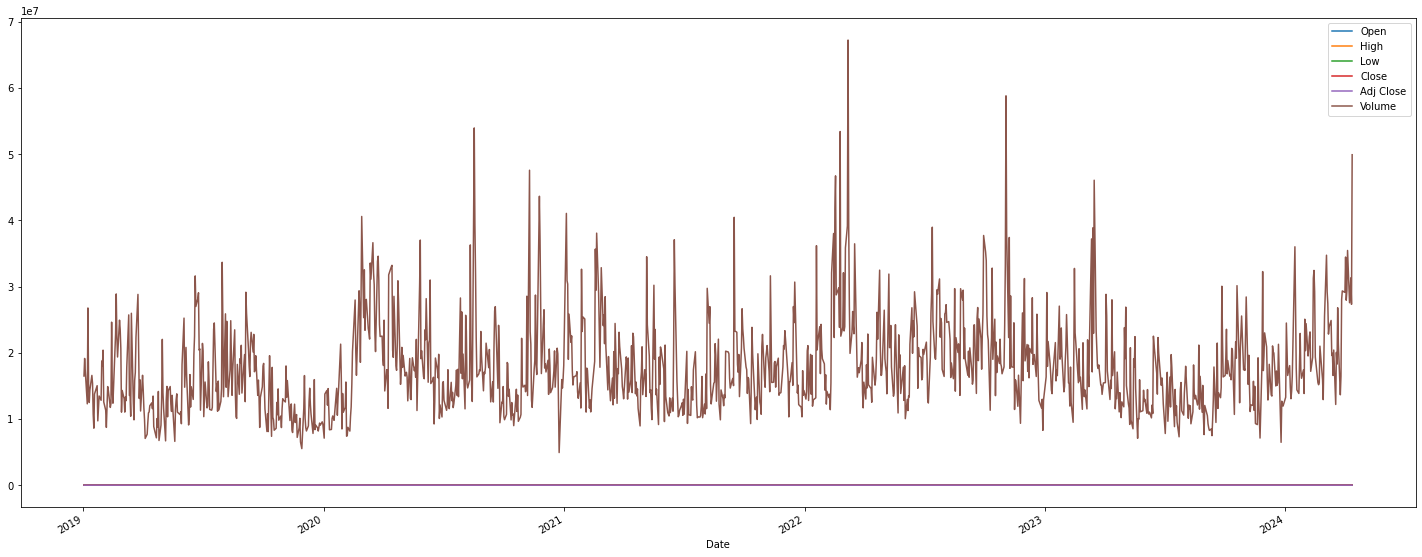

In [6]:
plt.figure(figsize=(12,6))
data.plot(figsize=(25,10))


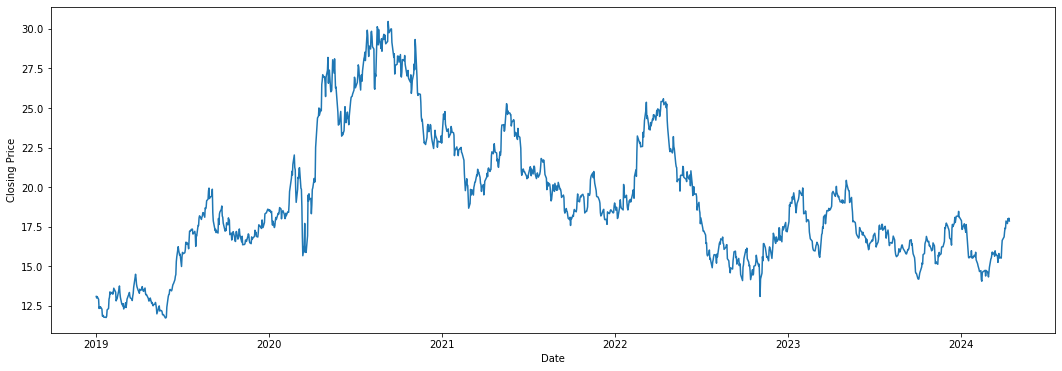

In [7]:
plt.figure(figsize=(18,6))
data["date"]=data.index
data
plt.plot(data['Close'])
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

# Decomposition

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
# multiplicative decomposition 
mult_result= seasonal_decompose(data['Close'],model = 'multiplicative',period=20)
# additive decomposition 
# add_result= seasonal_decompose(data['Close'],model = 'additive',period=20)

Text(0.5, 0.98, '\nMultiplicative Decompose')

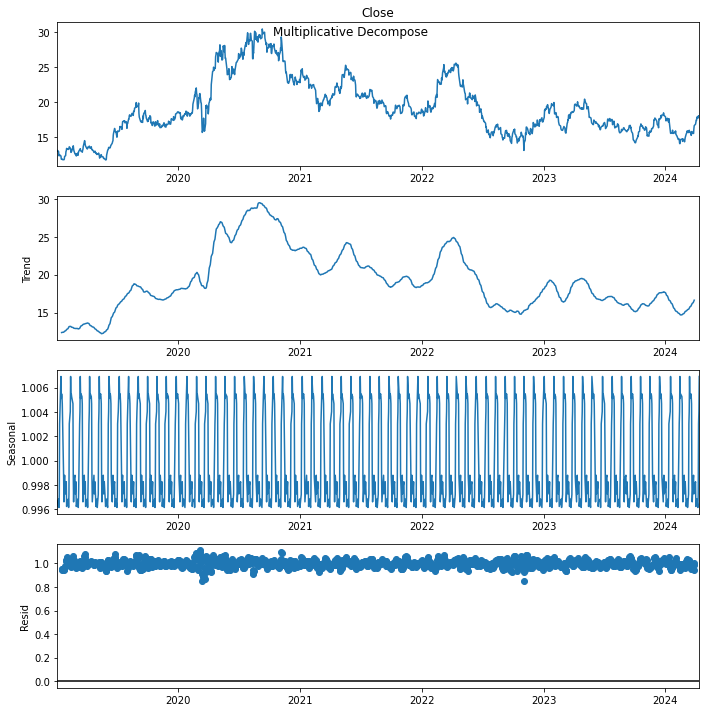

In [9]:
#plot
plt.rcParams.update({'figure.figsize':(10,10)})
mult_result.plot().suptitle('\nMultiplicative Decompose',fontsize=12)
# add_result.plot().suptitle('\nAdditive Decompose',fontsize=12)

# Statistical Tests to Check Stationarity in Time Series

# 1) Augmented Dickey Fuller Test

In [10]:
def adf(series):
    result = adfuller(series)
    print("AD: {}".format(result[0]))
    print("P-value: {}".format(result[1]))
    if result[1] <= 0.05:
        print("Is stationary")
    else:
        print("Not stationary")
adf(data['Close'])

AD: -2.2478349700019256
P-value: 0.1893441798702194
Not stationary


In [11]:
from statsmodels.tsa.stattools import kpss
kpss_p_value = kpss(data['Close'])[1]
if kpss_p_value < 0.05:
    print("Data is non-stationary.")
else:
    print("Data is Stationary.")

Data is non-stationary.


C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


# Differencing

First-Order Differencing

In [12]:
data["Closing_difference"]=data['Close'].diff(periods=1)

In [13]:
adf(data['Closing_difference'].dropna())

AD: -35.176514707990144
P-value: 0.0
Is stationary


In [14]:
kpss_p_value = kpss(data['Closing_difference'])[1]
if kpss_p_value < 0.05:
    print("Data is non-stationary.")
else:
    print("Data is Stationary.")

Data is Stationary.


C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


# AutoCorrelation Plot

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

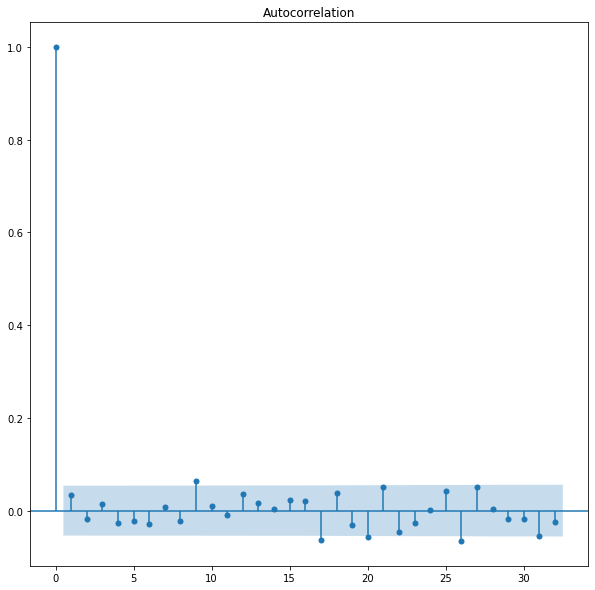

In [16]:
acf = plot_acf(data['Closing_difference'].dropna())

# Partial Autocorrelation Plot

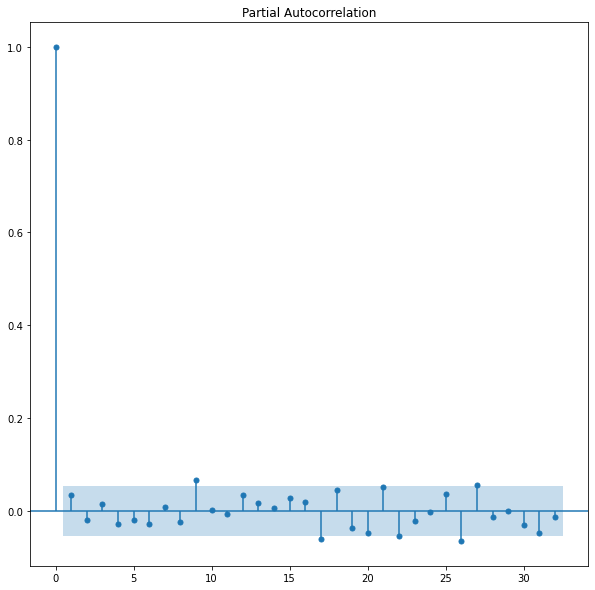

In [17]:
pacf = plot_pacf(data['Closing_difference'].dropna())

# Split the Model-Arima

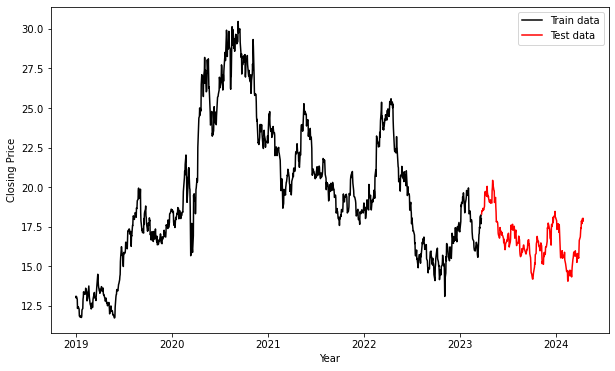

In [18]:
from statsmodels.tsa.arima.model import ARIMA
Stock_data_arima =data["Close"]
train_test_split_ratio = int(len(Stock_data_arima)*0.8)
train_data, test_data = Stock_data_arima[:train_test_split_ratio], Stock_data_arima[train_test_split_ratio:]
 
# Plotting the train and test sets.
plt.figure(figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.plot(train_data, 'black', label='Train data')
plt.plot(test_data, 'red', label='Test data')
plt.legend()

# import numpy as np
# model=ARIMA(np.asarray(data["Close"]),order=(6,1,6))
# results_ARIMA=model.fit()
# print(results_ARIMA.summary())

# MODEL FITTING-Arima

In [19]:
train_data =train_data.reset_index()
train_data['Date'] = pd.to_datetime(train_data['Date'], format = '%Y-%m-%d')

model = ARIMA(train_data["Close"],order = (6, 1, 6))  
#MODEL FITTING
model_fit = model.fit()  
print(model_fit.summary())

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1063
Model:                 ARIMA(6, 1, 6)   Log Likelihood                -724.381
Date:                Mon, 29 Apr 2024   AIC                           1474.762
Time:                        19:32:28   BIC                           1539.345
Sample:                             0   HQIC                          1499.237
                               - 1063                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1034      2.821      0.037      0.971      -5.426       5.632
ar.L2          0.3984      1.349      0.295      0.768      -2.246       3.043
ar.L3         -0.0018      0.350     -0.005      0.9

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Predictions and Plot on Test Values

In [20]:
start = len(train_data)
end = (len(train_data) + len(test_data)) - 1
model_predictions = model_fit.predict(start,end)
model_predictions = model_predictions.set_axis(test_data.index)
model_predictions.index

DatetimeIndex(['2023-03-23', '2023-03-24', '2023-03-27', '2023-03-28',
               '2023-03-29', '2023-03-30', '2023-03-31', '2023-04-03',
               '2023-04-04', '2023-04-05',
               ...
               '2024-04-01', '2024-04-02', '2024-04-03', '2024-04-04',
               '2024-04-05', '2024-04-08', '2024-04-09', '2024-04-10',
               '2024-04-11', '2024-04-12'],
              dtype='datetime64[ns]', name='Date', length=266, freq=None)

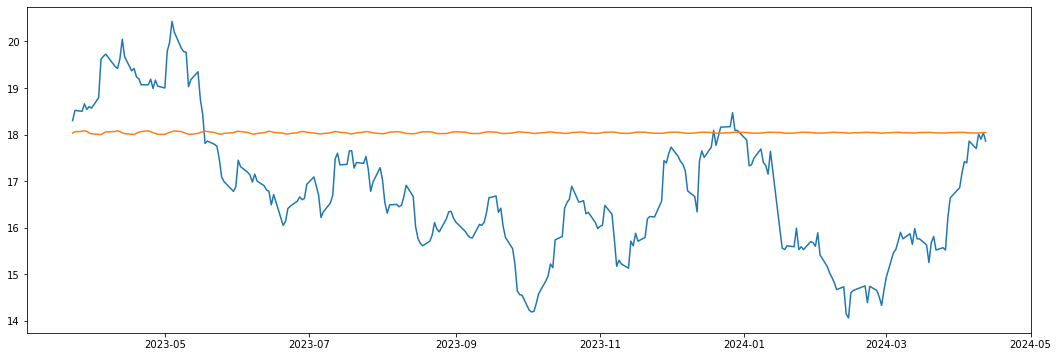

In [21]:
plt.figure(figsize=(18,6))
plt.plot(test_data, label='test data')
plt.plot(model_predictions,label='Predicted test data') 
plt.show()

# Forecasting for next Month-Arima

30
30
DatetimeIndex(['2024-04-13', '2024-04-14', '2024-04-15', '2024-04-16',
               '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-20',
               '2024-04-21', '2024-04-22', '2024-04-23', '2024-04-24',
               '2024-04-25', '2024-04-26', '2024-04-27', '2024-04-28',
               '2024-04-29', '2024-04-30', '2024-05-01', '2024-05-02',
               '2024-05-03', '2024-05-04', '2024-05-05', '2024-05-06',
               '2024-05-07', '2024-05-08', '2024-05-09', '2024-05-10',
               '2024-05-11', '2024-05-12'],
              dtype='datetime64[ns]', freq='D')


Text(0, 0.5, 'Closing Price')

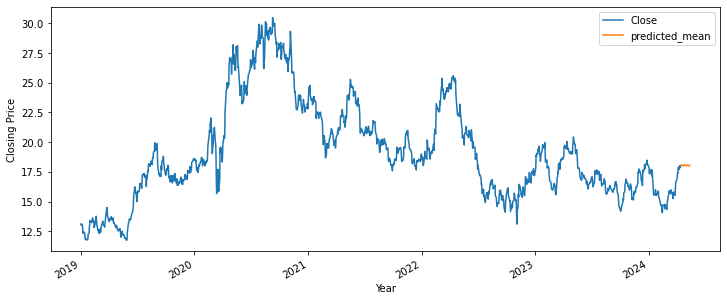

In [22]:
from datetime import datetime, timedelta
forecast = model_fit.forecast(steps=30)
print(len(forecast))
dates = pd.date_range(start=data.index[-1]+timedelta(days=1),end=data.index[-1]+timedelta(days=30), freq='D')
# Plot the forecast values
print(len(dates))
print(dates)
forecast.index=dates
data['Close'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)
plt.xlabel("Year")
plt.ylabel("Closing Price")


<AxesSubplot:>

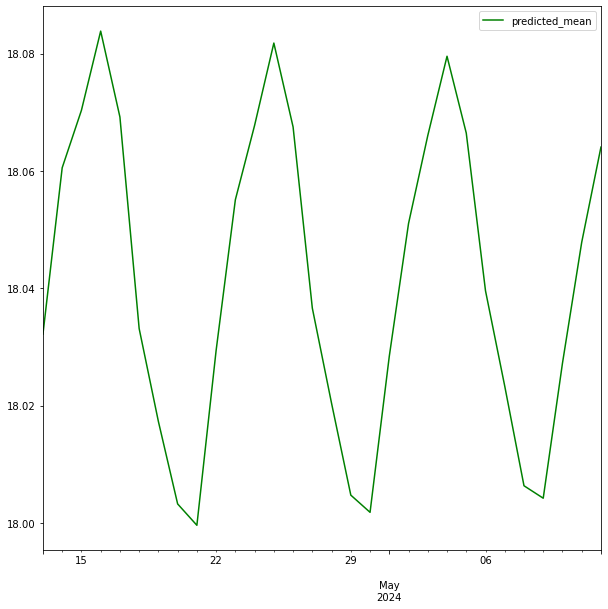

In [23]:
forecast.plot(legend = True,color="Green")

# Performance Metrics-Arima

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(test_data,model_predictions )
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data,model_predictions)

print(f'Mean Squared Error (MSE): {mse: .2f}')
print(f'Root Mean Squared Error (RMSE): {rmse: .2f}')
print(f'Mean Absolute Error (MAE): {mae: .2f}')

Mean Squared Error (MSE):  3.63
Root Mean Squared Error (RMSE):  1.90
Mean Absolute Error (MAE):  1.65


# Sarima

In [25]:
# data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data = data.reset_index()

# Model Fitting-Sarima

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(train_data['Close'], order=(6,1,6),
                seasonal_order=(6,1,6,12))
sarima_predict = sarima.fit()
sarima_forecast = sarima_predict.forecast(steps=30)

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Forecasting Values

In [27]:
sarima_forecast

1063    17.940846
1064    18.110081
1065    18.067003
1066    18.110313
1067    18.153670
1068    18.117570
1069    18.077254
1070    18.148963
1071    18.302161
1072    18.318492
1073    18.191097
1074    18.265135
1075    18.270389
1076    18.382073
1077    18.357664
1078    18.396345
1079    18.389365
1080    18.327593
1081    18.262767
1082    18.178494
1083    18.092575
1084    18.090056
1085    18.036573
1086    18.063980
1087    18.052613
1088    18.099573
1089    18.027277
1090    18.065013
1091    18.071906
1092    18.056321
Name: predicted_mean, dtype: float64

# Predictions and plot on Test Values

In [28]:
start = len(train_data)
end = (len(train_data) + len(test_data)) - 1
sarima_predictions = sarima_predict.predict(start,end)

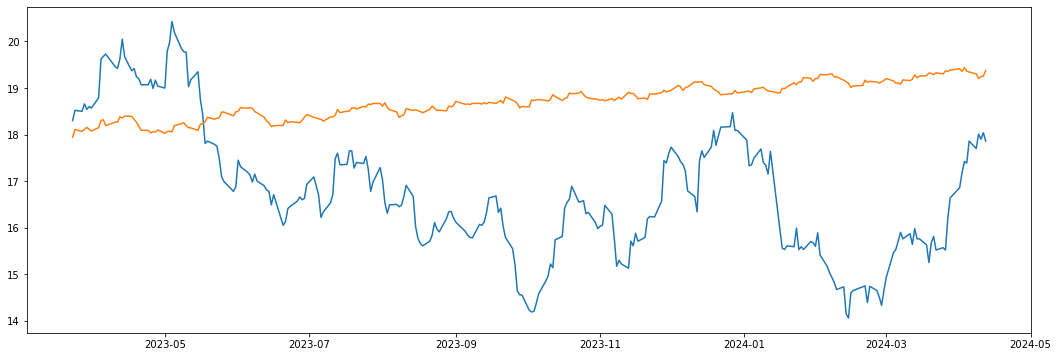

In [29]:
plt.figure(figsize=(18,6))
train_index = train_data.index.to_numpy()
test_index = test_data.index.to_numpy()
plt.plot(test_index,test_data.values, label='Testing data')
plt.plot(test_index,sarima_predictions.values, label='Forecast')
plt.show()

# Forecasting for Next month-Sarima

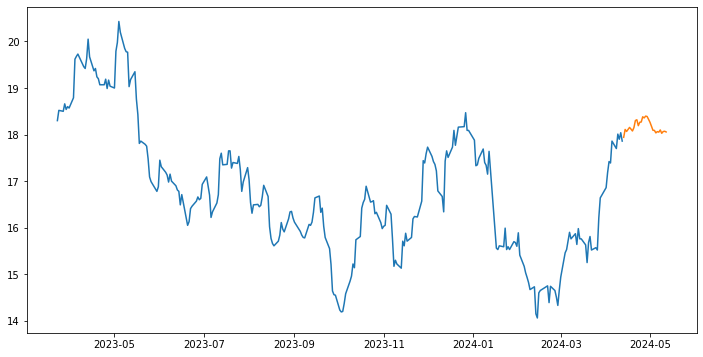

In [30]:

test_index = test_data.index.to_numpy()
sarima_forecast_index = pd.date_range(test_index[-1],periods=31)[1:].to_numpy()

plt.figure(figsize=(12,6))
plt.plot(test_index, test_data.values, label='Testing data')
plt.plot(sarima_forecast_index, sarima_forecast.values, label='Forecast')
plt.show()


# Performance Metrics-Sarima

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(test_data,sarima_predictions  )
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data,sarima_predictions)

print(f'Mean Squared Error (MSE): {mse: .2f}')
print(f'Root Mean Squared Error (RMSE): {rmse: .2f}')
print(f'Mean Absolute Error (MAE): {mae: .2f}')

Mean Squared Error (MSE):  6.55
Root Mean Squared Error (RMSE):  2.56
Mean Absolute Error (MAE):  2.28
